# The Data Incubator Challenge 2018
## by Maryuri Quintero


The lack of education is decreasing the chances of improvement in many places around the world. When people do not have access to education, they mislead their energy to find success in activities that do not contribute to the society where they live.  The World Bank has provided data regarding the education in more than 200 economies around the world. I propose to analyze the given education data to find common factors in the education in different parts of the world.

#### Data source:
https://datacatalog.worldbank.org/dataset/education-statistics

In [0]:
#IMPORTING LIBRARIES
from __future__ import print_function
import os
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

#!pip install seaborn==0.9.0

In [20]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [22]:
file_name = "EdStatsData (1).csv"

project = pd.read_csv(file_name)   
 
print(project.shape)             #Number of observations and variables in the dataset

(886930, 70)


#Data Exploration

In [7]:
project.head(5)  # First 5 rows of the dataset

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Missing values per column

In [45]:
for col in project.columns:                     
    print(col, project[col].isnull().sum())

Country Name 0
Country Code 0
Indicator Name 0
Indicator Code 0
1970 814642
1971 851393
1972 851311
1973 851385
1974 851200
1975 799624
1976 849447
1977 849356
1978 849354
1979 850121
1980 797808
1981 848153
1982 849419
1983 848470
1984 848324
1985 796634
1986 847558
1987 848289
1988 848378
1989 849390
1990 762525
1991 812493
1992 811387
1993 811137
1994 809468
1995 755569
1996 810123
1997 813477
1998 802016
1999 768091
2000 710254
2001 763421
2002 762725
2003 756567
2004 758116
2005 702822
2006 746618
2007 749658
2008 752543
2009 744822
2010 644488
2011 740918
2012 739666
2013 749421
2014 773141
2015 755872
2016 870470
2017 886787
2020 835494
2025 835494
2030 835494
2035 835494
2040 835494
2045 835494
2050 835494
2055 835494
2060 835494
2065 835494
2070 835494
2075 835494
2080 835494
2085 835494
2090 835494
2095 835494
2100 835494
Unnamed: 69 886930


In [8]:
project.loc[:,'Country Name':'Indicator Code'].describe()

,Country Name,Country Code,Indicator Name,Indicator Code
count,886930,886930,886930,886930
unique,242,242,3665,3665
top,Lithuania,LUX,Wittgenstein Projection: Percentage of the tot...,HH.MICS.NAR.23.M
freq,3665,3665,242,242


#### Unique country names and codes 

In [9]:
countries = project.loc[:,['Country Name','Country Code']].drop_duplicates()
print (countries)

                                             Country Name Country Code
0                                              Arab World          ARB
3665                                  East Asia & Pacific          EAS
7330          East Asia & Pacific (excluding high income)          EAP
10995                                           Euro area          EMU
14660                               Europe & Central Asia          ECS
18325       Europe & Central Asia (excluding high income)          ECA
21990                                      European Union          EUU
25655              Heavily indebted poor countries (HIPC)          HPC
29320                                         High income          HIC
32985                           Latin America & Caribbean          LCN
36650   Latin America & Caribbean (excluding high income)          LAC
40315        Least developed countries: UN classification          LDC
43980                                 Low & middle income          LMY
47645 

#### Indicator names

In [31]:
print (project["Indicator Name"].value_counts())

Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Incomplete Primary. Total    242
Labor force with basic education, male (% of male labor force)                                                                       242
MICS: Typology of out-of-school children. Primary. Dropped out. Urban                                                                242
Population, ages 12-15, male                                                                                                         242
PIAAC: Adults by literacy proficiency level (%). Level 2                                                                             242
Wittgenstein Projection: Population age 25-29 in thousands by highest level of educational attainment. Upper Secondary. Male         242
Percentage of students in tertiary ISCED 6 programmes who are female (%)                                                             242
EGRA: Correct Non-Words Read Per Minute (

#### Deleting duplicates

In [28]:
#Finding unique indicators 

indicators = project.loc[:,['Indicator Name','Indicator Code']].drop_duplicates()
indicators.head()

,Indicator Name,Indicator Code
0,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2
1,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F
2,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI
3,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M
4,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR


#### Exploring data for a specific country

In [11]:
# Finding the code for a specific country

countries[countries['Country Name'].str.contains('Panama')]

,Country Name,Country Code
641375,Panama,PAN


In [12]:
# Getting observations for an specific country

panama = project.loc[project['Country Code']=='PAN']
panama.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
641375,Panama,PAN,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
641376,Panama,PAN,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
641377,Panama,PAN,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
641378,Panama,PAN,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
641379,Panama,PAN,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Number of observations and variables for a specific country

panama.shape

(3665, 70)

In [14]:
# Deleting rows with more than 5 missing values for a specific country

panama_clean = panama.dropna('index', thresh = 5)
panama_clean.shape

(1982, 70)

In [15]:
panama_clean.head() 

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
641375,Panama,PAN,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
641376,Panama,PAN,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
641377,Panama,PAN,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
641378,Panama,PAN,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
641379,Panama,PAN,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Exploration: Finding the types of PISA assessments

In [18]:
# Indicators with PISA(programme for international student assessment) names
indicators[indicators['Indicator Name'].str.contains('PISA')].head()

,Indicator Name,Indicator Code
2208,PISA: 15-year-olds by mathematics proficiency ...,LO.PISA.MAT.0
2209,PISA: 15-year-olds by mathematics proficiency ...,LO.PISA.MAT.1
2210,PISA: 15-year-olds by mathematics proficiency ...,LO.PISA.MAT.2
2211,PISA: 15-year-olds by mathematics proficiency ...,LO.PISA.MAT.3
2212,PISA: 15-year-olds by mathematics proficiency ...,LO.PISA.MAT.4


#### Exploration: Finding specific names in a colum

In [103]:
indicators[indicators['Indicator Name'].str.contains('Labor force with basic education')].head(10)

,Indicator Name,Indicator Code
1379,Labor force with basic education (% of total),SL.TLF.BASC.ZS
1380,"Labor force with basic education, female (% of...",SL.TLF.BASC.FE.ZS
1381,"Labor force with basic education, male (% of m...",SL.TLF.BASC.MA.ZS


#GRAPHS

#### Graph 1: Percentage of students enrolled in Engineering careers by country, 2014.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


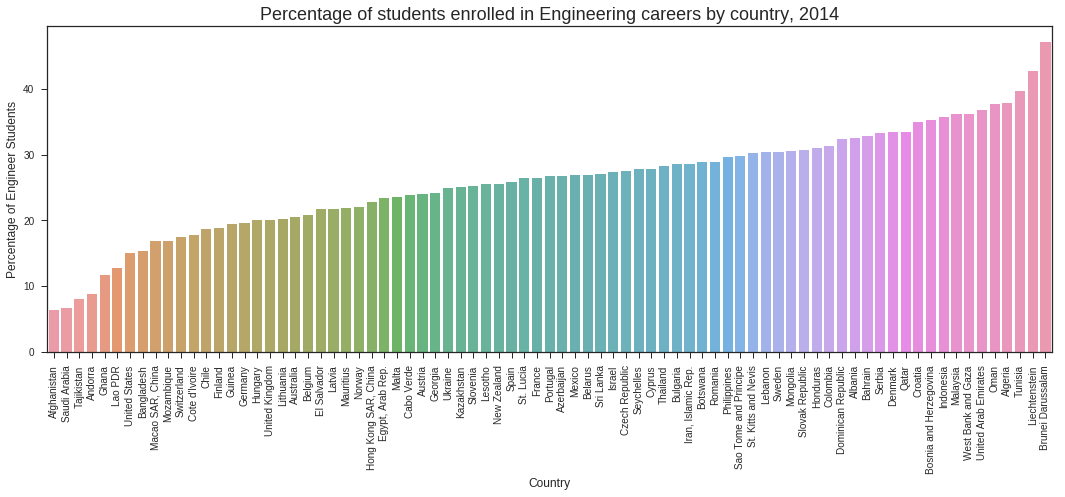

In [83]:
color = sns.color_palette()
#ocurrences
count = project.loc[:,['Country Name','2014']][project['Indicator Code']=='UIS.FEP.56.F500'].dropna()
result = count.sort_values(by=['2014'])

#size of the plot
plt.figure(figsize=(18, 6)) 
labels = result['Country Name']
 
g = sns.barplot(labels, result['2014'], alpha=0.8, palette = 'husl')   #type of graph that has x-labels, counting values, space bw bars, color number
g.set_xticklabels(labels, rotation=90)


plt.title('Percentage of students enrolled in Engineering careers by country, 2014', fontsize=18)
plt.ylabel('Percentage of Engineer Students', fontsize=12)    #Label y-axis
plt.xlabel('Country', fontsize=12)     #Label x-axis
plt.show()

#### Graph 2: Youth illiterate population, 15-24 years, female by country, 2014

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


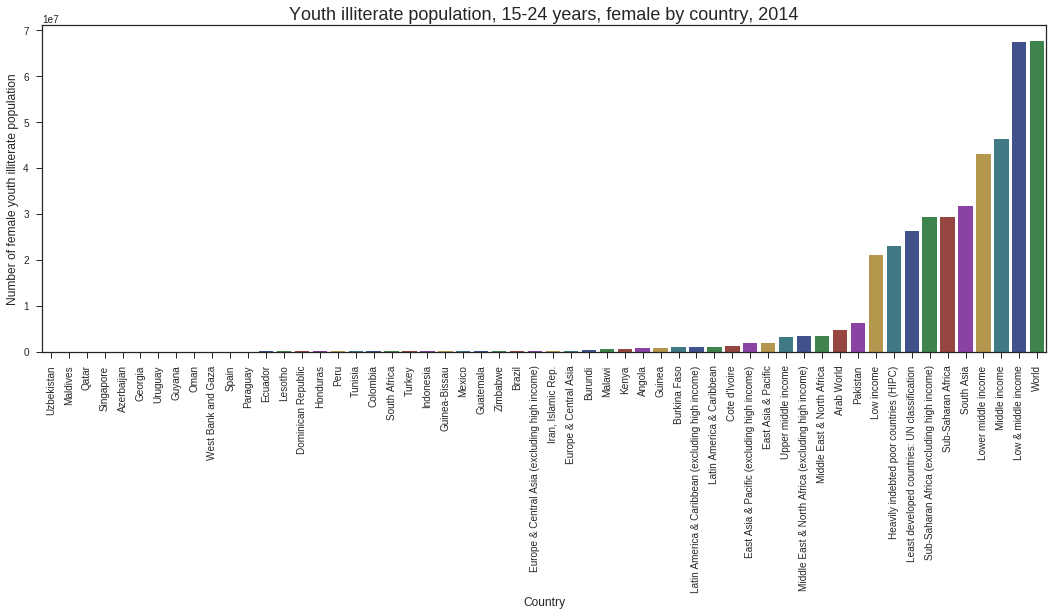

In [96]:
color = sns.color_palette()
#ocurrences
count = project.loc[:,['Country Name','2014']][project['Indicator Code']=='UIS.LP.AG15T24.F'].dropna()
result = count.sort_values(by=['2014'])

#size of the plot
plt.figure(figsize=(18, 6)) 
labels = result['Country Name']
 
g = sns.barplot(labels, result['2014'], alpha=0.8, palette = 'dark')   #type of graph that has x-labels, counting values, space bw bars, color number
g.set_xticklabels(labels, rotation=90)


plt.title('Youth illiterate population, 15-24 years, female by country, 2014', fontsize=18)
plt.ylabel('Number of female youth illiterate population', fontsize=12)    #Label y-axis
plt.xlabel('Country', fontsize=12)     #Label x-axis
plt.show()

#### Graph 3: Youth illiterate population, 15-24 years, male by country, 2014

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


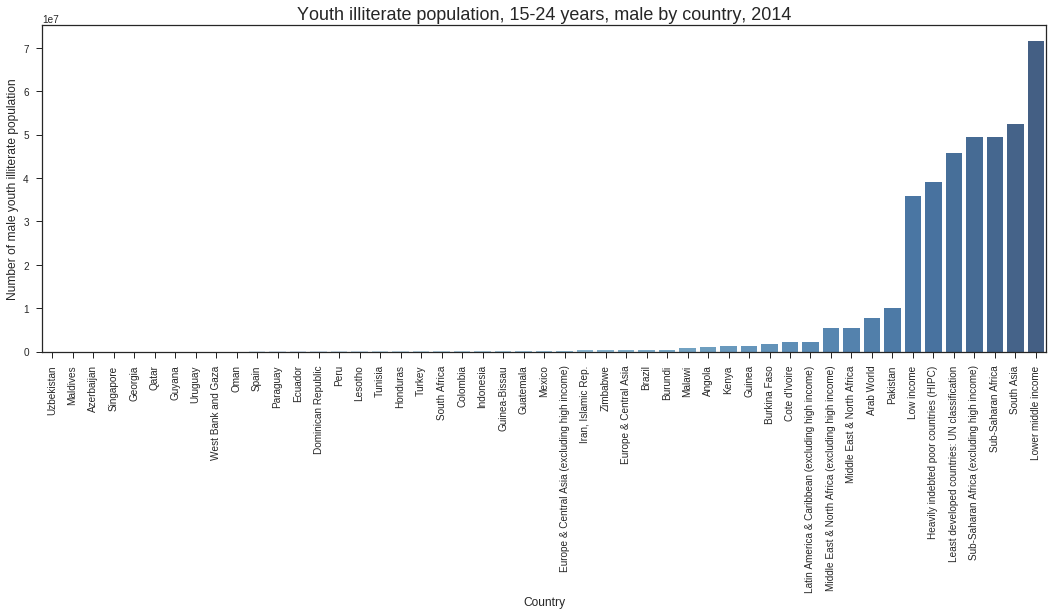

In [102]:
color = sns.color_palette()
#ocurrences
count = project.loc[:,['Country Name','2014']][project['Indicator Code']=='UIS.LP.AG15T24'].dropna()
result = count.sort_values(by=['2014'])

#size of the plot
plt.figure(figsize=(18, 6)) 
labels = result['Country Name']
 
g = sns.barplot(labels, result['2014'], alpha=0.8, palette = 'Blues')   #type of graph that has x-labels, counting values, space bw bars, color number
g.set_xticklabels(labels, rotation=90)


plt.title('Youth illiterate population, 15-24 years, male by country, 2014', fontsize=18)
plt.ylabel('Number of male youth illiterate population', fontsize=12)    #Label y-axis
plt.xlabel('Country', fontsize=12)     #Label x-axis
plt.show()

#### Graph 4: Male labor force with basic education per country, 2014

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  cat_pos = np.ones(swarm_data.size) * center


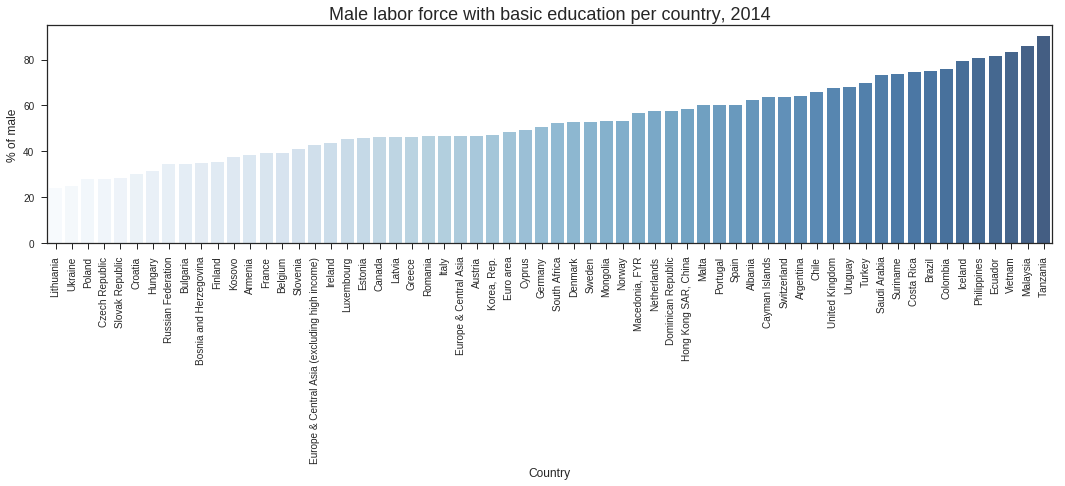

In [43]:
color = sns.color_palette()
#ocurrences
labor_male = project.loc[:,['Country Name','2014']][project['Indicator Code']=='SL.TLF.BASC.MA.ZS'].dropna()
labor = labor_male.sort_values(by=['2014'])

#size of the plot
plt.figure(figsize=(18, 4)) 
labels = labor['Country Name']
 
g = sns.barplot(labels, labor['2014'], alpha=0.8, palette = 'Blues')   #type of graph that has x-labels, counting values, space bw bars, color number
g.set_xticklabels(labels, rotation=90)


plt.title('Male labor force with basic education per country, 2014', fontsize=18)
plt.ylabel('% of male', fontsize=12)    #Label y-axis
plt.xlabel('Country', fontsize=12)     #Label x-axis
plt.show()

#### Graph 5: female labor force with basic education per country, 2014

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  cat_pos = np.ones(swarm_data.size) * center


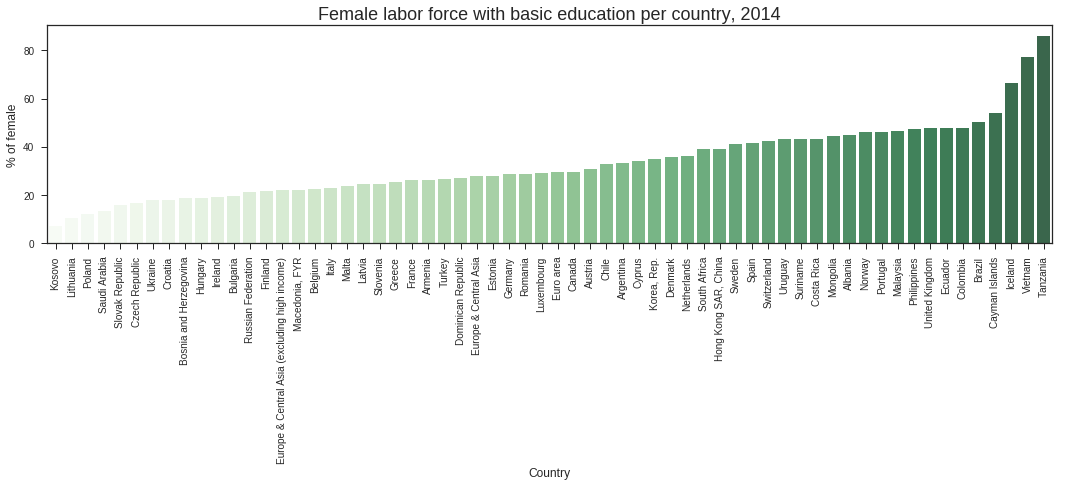

In [44]:
color = sns.color_palette()
#ocurrences
labor_female = project.loc[:,['Country Name','2014']][project['Indicator Code']=='SL.TLF.BASC.FE.ZS'].dropna()
labor = labor_female.sort_values(by=['2014'])

#size of the plot
plt.figure(figsize=(18, 4)) 
labels = labor['Country Name']
 
g = sns.barplot(labels, labor['2014'], alpha=0.8, palette = 'Greens')   #type of graph that has x-labels, counting values, space bw bars, color number
g.set_xticklabels(labels, rotation=90)


plt.title('Female labor force with basic education per country, 2014', fontsize=18)
plt.ylabel('% of female', fontsize=12)    #Label y-axis
plt.xlabel('Country', fontsize=12)     #Label x-axis
plt.show()

#### Graph 6: Missing Values per year

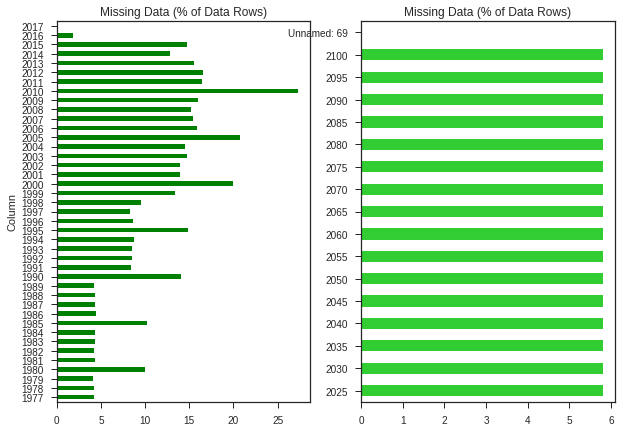

In [46]:
present_missing = project.loc[:,'1977':'2017'].notnull().sum()/len(project)*100
future_missing = project.loc[:,'2025':].notnull().sum()/len(project)*100
plt.figure(figsize=(10,7))
plt.subplot(121)
present_missing.plot(kind='barh', color='green')
plt.title('Missing Data (% of Data Rows)')
plt.ylabel('Column')
plt.subplot(122)
future_missing.plot(kind='barh', color='limegreen')
plt.title('Missing Data (% of Data Rows)')
plt.show()